In [2]:
import sys
import dill
import importlib

import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../src')
import policies 
import bbDebiasing
import maxEnsembleDebias

sys.path.append('experiment-pipeline')
import analysisHelp
import dataGeneration

Comparison of final WB and BB Models

In [17]:
importlib.reload(analysisHelp)

pathA = ['linear-label_gb_coord_variance_5000_subsample400_BBModel.pkl',
'linear-label_gb_coord_variance_5000_subsample400_MaxEnsemble.pkl']
pathB = ['linear-label_gb_group_variance_5000_subsample400_BBModel.pkl',
'linear-label_gb_group_variance_5000_subsample400_MaxEnsemble.pkl']
pathC = ['linear-label_gb_coord_linear-constraint_5000_subsample400_BBModel.pkl',
'linear-label_gb_coord_linear-constraint_5000_subsample400_MaxEnsemble.pkl']
pathD = ['linear-label_gb_group_linear-constraint_8000_subsample400_BBModel.pkl',
'linear-label_gb_group_linear-constraint_8000_subsample400_MaxEnsemble.pkl']

pathsets = [pathA, pathB, pathC, pathD]
experimentNames = ["A","B","C","D"]



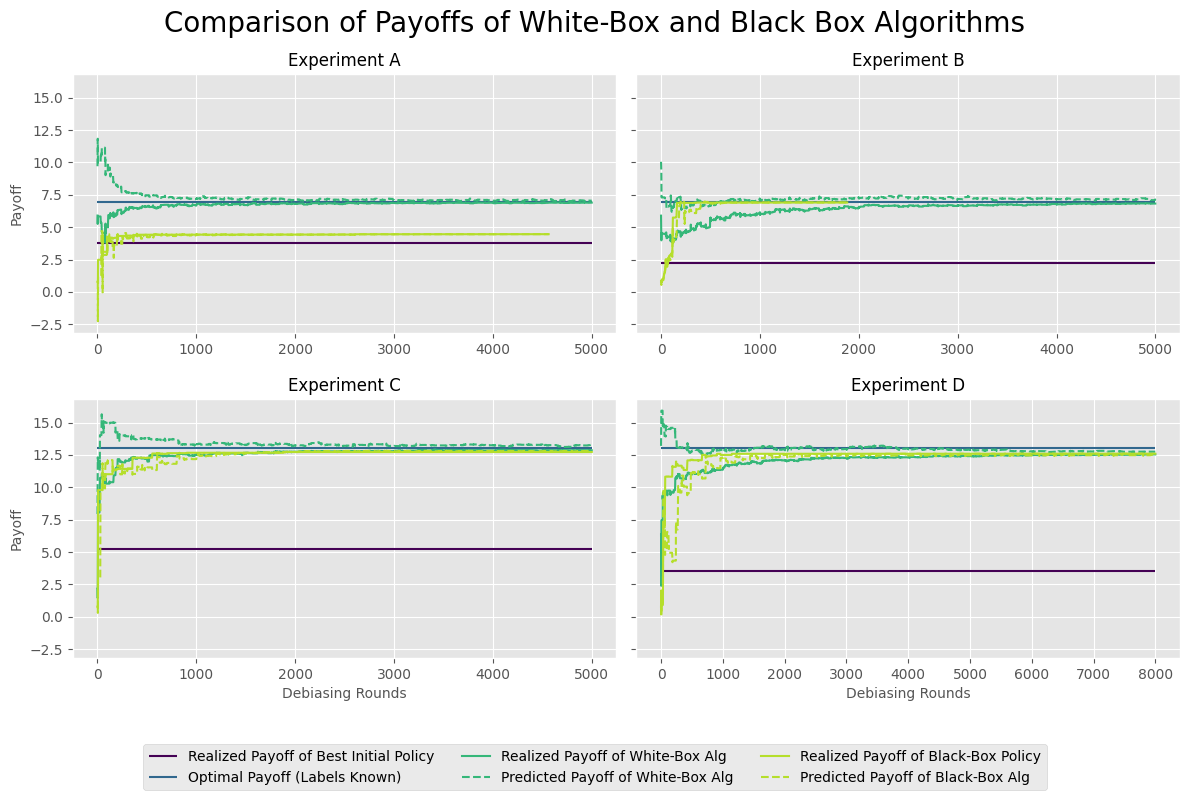

In [5]:
# plt.style.use('ggplot')

# # Number of colors you want
# n_colors = 10
# # Choose a colormap
# colormap = plt.get_cmap('viridis')
# # Generate colors from the colormap
# colors = [colormap(i) for i in np.linspace(0, 1, n_colors)]
# # Update the default color cycle
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# fig, axs = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(12, 8))
# fig.tight_layout(pad=4.0)  # Use tight_layout for better spacing

# for i in range(len(pathsets)):

#     bbPath = f'experiment-pipeline/debiased-models/{pathsets[i][0]}'
#     wbPath = f'experiment-pipeline/debiased-models/{pathsets[i][1]}'
#     with open(bbPath, 'rb') as file:
#         bbModel = dill.load(file)
#     with open(wbPath, 'rb') as file:
#         maxModel = dill.load(file)

#     BBpred_rev = np.mean(np.sum(np.multiply(bbModel.predictions_by_round, np.array(bbModel.policy_by_round)), axis=2), axis=1)
#     BBreal_rev = np.mean(np.sum(np.multiply(np.tile(bbModel.train_y, (len(bbModel.policy_by_round),1,1)), np.array(bbModel.policy_by_round)), axis=2), axis=1)
#     maxEnsemblereal_rev = np.mean(np.array(maxModel.realized_revs_by_round), axis=2)
#     meta_real_rev = []
#     meta_pred_rev = []
#     for j in range(maxModel.curr_depth):
#         meta_real_rev.append(np.mean(maxModel.realized_revs_by_round[j][maxModel.max_policy_index_by_round[j], np.arange(maxModel.n)]))
#         meta_pred_rev.append(np.mean(maxModel.self_assessed_revs_by_round[j][maxModel.max_policy_index_by_round[j], np.arange(maxModel.n)]))

#     max_init_model = max([maxEnsemblereal_rev[0,i] for i in range(maxModel.n_models)])

#     if i==0:
#         axs[i//2,i%2].hlines(max_init_model, 0, maxModel.curr_depth-1, label=f"Realized Payoff of Best Initial Policy", color=colors[0])
#         axs[i//2,i%2].hlines(np.mean(np.einsum('ij, ij->i', maxModel.train_y, maxModel.policies[0].run_given_preds(maxModel.train_y))), 0, maxModel.curr_depth-1, label="Optimal Payoff (Labels Known)", color=colors[3])
#         axs[i//2,i%2].plot(np.arange(maxModel.curr_depth), meta_real_rev, label=f"Realized Payoff of White Box Alg", color=colors[6])
#         axs[i//2,i%2].plot(np.arange(maxModel.curr_depth), meta_pred_rev, '--', label=f"Predicted Payoff of White Box Alg", color=colors[6])
#         axs[i//2,i%2].plot(np.arange(len(BBreal_rev[:-1])), BBreal_rev[:-1], label="Realized Payoff of Black Box Policy", color=colors[8])
#         axs[i//2,i%2].plot(np.arange(len(BBpred_rev[:-1])), BBpred_rev[:-1], '--', label="Predicted Payoff of Black Box Alg", color=colors[8])
#         axs[i//2,i%2].set_title(f'Experiment {experimentNames[i]}', fontsize=12)
        
#     else:
#         axs[i//2,i%2].hlines(max_init_model, 0, maxModel.curr_depth-1, color=colors[0])
#         axs[i//2,i%2].hlines(np.mean(np.einsum('ij, ij->i', maxModel.train_y, maxModel.policies[0].run_given_preds(maxModel.train_y))), 0, maxModel.curr_depth-1, color=colors[3])
#         axs[i//2,i%2].plot(np.arange(maxModel.curr_depth), meta_real_rev, color=colors[6])
#         axs[i//2,i%2].plot(np.arange(maxModel.curr_depth), meta_pred_rev, '--', color=colors[6])
#         axs[i//2,i%2].plot(np.arange(len(BBreal_rev[:-1])), BBreal_rev[:-1], color=colors[8])
#         axs[i//2,i%2].plot(np.arange(len(BBpred_rev[:-1])), BBpred_rev[:-1], '--', color=colors[8])
#         axs[i//2,i%2].set_title(f'Experiment {experimentNames[i]}', fontsize=12)

# axs[0,0].set_ylabel('Payoff', fontsize=10)
# axs[1,0].set_ylabel('Payoff', fontsize=10)
# axs[1,0].set_xlabel('Debiasing Rounds', fontsize=10)
# axs[1,1].set_xlabel('Debiasing Rounds', fontsize=10)

# fig.suptitle("Comparison of Payoffs of White Box and Black Box Algorithms", fontsize=20)
# plt.tight_layout(rect=[0, 0.1, 1, 0.95])
# plt.subplots_adjust(top=0.9, bottom=0.17) 
# fig.legend(loc='lower center', ncol=3)
# plt.savefig('paper-figs/WBvsBB.pdf')

plt.style.use('ggplot')

# Number of colors you want
n_colors = 10
# Choose a colormap
colormap = plt.get_cmap('viridis')
# Generate colors from the colormap
colors = [colormap(i) for i in np.linspace(0, 1, n_colors)]
# Update the default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

fig, axs = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(12, 8))
fig.tight_layout(pad=4.0)  # Use tight_layout for better spacing

for i in range(len(pathsets)):

    bbPath = f'experiment-pipeline/debiased-models/{pathsets[i][0]}'
    wbPath = f'experiment-pipeline/debiased-models/{pathsets[i][1]}'
    with open(bbPath, 'rb') as file:
        bbModel = dill.load(file)
    with open(wbPath, 'rb') as file:
        maxModel = dill.load(file)

    BBpred_rev = np.mean(np.sum(np.multiply(bbModel.predictions_by_round, np.array(bbModel.policy_by_round)), axis=2), axis=1)
    BBreal_rev = np.mean(np.sum(np.multiply(np.tile(bbModel.train_y, (len(bbModel.policy_by_round),1,1)), np.array(bbModel.policy_by_round)), axis=2), axis=1)
    #maxEnsemblereal_rev = np.mean(np.array(maxModel.realized_revs_by_round), axis=2)
    meta_real_rev = []
    meta_pred_rev = []
    for j in range(maxModel.curr_depth):
        meta_real_rev.append(np.mean(maxModel.realized_revs_by_round[j][maxModel.max_policy_index_by_round[j], np.arange(maxModel.n)]))
        meta_pred_rev.append(np.mean(maxModel.self_assessed_revs_by_round[j][maxModel.max_policy_index_by_round[j], np.arange(maxModel.n)]))

    max_init_model = np.max(np.mean(maxModel.realized_revs_by_round[0], axis=1))

    if i==0:
        axs[i//2,i%2].hlines(max_init_model, 0, maxModel.curr_depth-1, label=f"Realized Payoff of Best Initial Policy", color=colors[0])
        axs[i//2,i%2].hlines(np.mean(np.einsum('ij, ij->i', maxModel.train_y, maxModel.policies[0].run_given_preds(maxModel.train_y))), 0, maxModel.curr_depth-1, label="Optimal Payoff (Labels Known)", color=colors[3])
        axs[i//2,i%2].plot(np.arange(maxModel.curr_depth), meta_real_rev, label=f"Realized Payoff of White-Box Alg", color=colors[6])
        axs[i//2,i%2].plot(np.arange(maxModel.curr_depth), meta_pred_rev, '--', label=f"Predicted Payoff of White-Box Alg", color=colors[6])
        axs[i//2,i%2].plot(np.arange(len(BBreal_rev[:-1])), BBreal_rev[:-1], label="Realized Payoff of Black-Box Policy", color=colors[8])
        axs[i//2,i%2].plot(np.arange(len(BBpred_rev[:-1])), BBpred_rev[:-1], '--', label="Predicted Payoff of Black-Box Alg", color=colors[8])
        axs[i//2,i%2].set_title(f'Experiment {experimentNames[i]}', fontsize=12)
        
    else:
        axs[i//2,i%2].hlines(max_init_model, 0, maxModel.curr_depth-1, color=colors[0])
        axs[i//2,i%2].hlines(np.mean(np.einsum('ij, ij->i', maxModel.train_y, maxModel.policies[0].run_given_preds(maxModel.train_y))), 0, maxModel.curr_depth-1, color=colors[3])
        axs[i//2,i%2].plot(np.arange(maxModel.curr_depth), meta_real_rev, color=colors[6])
        axs[i//2,i%2].plot(np.arange(maxModel.curr_depth), meta_pred_rev, '--', color=colors[6])
        axs[i//2,i%2].plot(np.arange(len(BBreal_rev[:-1])), BBreal_rev[:-1], color=colors[8])
        axs[i//2,i%2].plot(np.arange(len(BBpred_rev[:-1])), BBpred_rev[:-1], '--', color=colors[8])
        axs[i//2,i%2].set_title(f'Experiment {experimentNames[i]}', fontsize=12)

axs[0,0].set_ylabel('Payoff', fontsize=10)
axs[1,0].set_ylabel('Payoff', fontsize=10)
axs[1,0].set_xlabel('Debiasing Rounds', fontsize=10)
axs[1,1].set_xlabel('Debiasing Rounds', fontsize=10)

fig.suptitle("Comparison of Payoffs of White-Box and Black Box Algorithms", fontsize=20)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.subplots_adjust(top=0.9, bottom=0.17) 
fig.legend(loc='lower center', ncol=3)
plt.savefig('paper-figs/WBvsBB.pdf')

Looking at White Box Alg internals

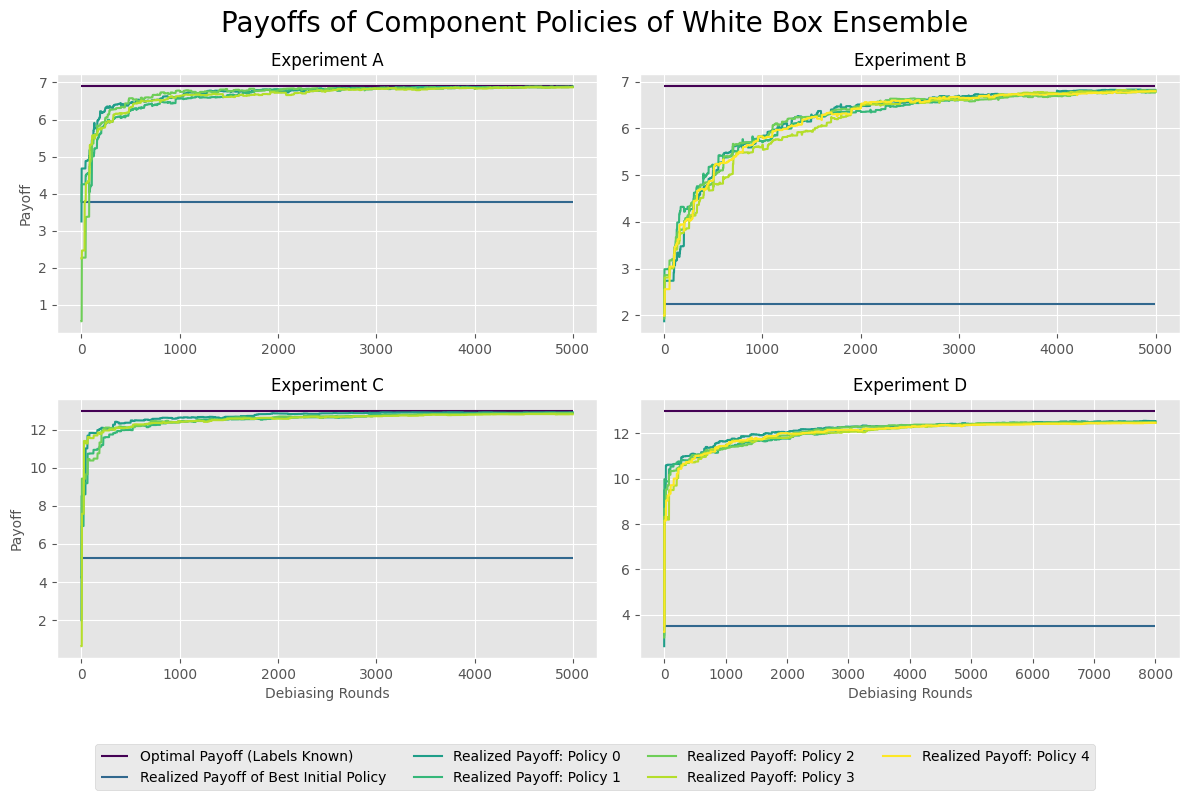

In [74]:
plt.style.use('ggplot')

# Number of colors you want
n_colors = 10
# Choose a colormap
colormap = plt.get_cmap('viridis')
# Generate colors from the colormap
colors = [colormap(i) for i in np.linspace(0, 1, n_colors)]
# Update the default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(12, 8))
fig.tight_layout(pad=4.0)  # Use tight_layout for better spacing

for i in range(len(pathsets)):

    bbPath = f'experiment-pipeline/debiased-models/{pathsets[i][0]}'
    wbPath = f'experiment-pipeline/debiased-models/{pathsets[i][1]}'
    with open(bbPath, 'rb') as file:
        bbModel = dill.load(file)
    with open(wbPath, 'rb') as file:
        maxModel = dill.load(file)

    pred_rev = np.mean(np.array(maxModel.self_assessed_revs_by_round), axis=2)
    real_rev = np.mean(np.array(maxModel.realized_revs_by_round), axis=2)
    max_init_model = max([real_rev[0,i] for i in range(maxModel.n_models)])
    n = len(maxModel.self_assessed_revs_by_round)

    if i==1:
        axs[i//2,i%2].hlines(np.mean(np.einsum('ij, ij->i', maxModel.train_y, maxModel.policies[0].run_given_preds(maxModel.train_y))), 0, n-1, label="Optimal Payoff (Labels Known)", color=colors[0])
        axs[i//2,i%2].hlines(max_init_model, 0, maxModel.curr_depth-1, label=f"Realized Payoff of Best Initial Policy", color=colors[3])
        for j in range(maxModel.n_models):
            axs[i//2,i%2].plot(np.arange(n), real_rev[:,j], label=f"Realized Payoff: Policy {j}", color=colors[5+j])
        axs[i//2,i%2].set_title(f'Experiment {experimentNames[i]}', fontsize=12)
        
    else:
        axs[i//2,i%2].hlines(np.mean(np.einsum('ij, ij->i', maxModel.train_y, maxModel.policies[0].run_given_preds(maxModel.train_y))), 0, n-1, color=colors[0])
        axs[i//2,i%2].hlines(max_init_model, 0, maxModel.curr_depth-1, color=colors[3])
        for j in range(maxModel.n_models):
            axs[i//2,i%2].plot(np.arange(n), real_rev[:,j], color=colors[5+j])
        axs[i//2,i%2].set_title(f'Experiment {experimentNames[i]}', fontsize=12)

axs[0,0].set_ylabel('Payoff', fontsize=10)
axs[1,0].set_ylabel('Payoff', fontsize=10)
axs[1,0].set_xlabel('Debiasing Rounds', fontsize=10)
axs[1,1].set_xlabel('Debiasing Rounds', fontsize=10)

fig.suptitle("Payoffs of Component Policies of White Box Ensemble", fontsize=20)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.subplots_adjust(top=0.9, bottom=0.17) 
fig.legend(loc='lower center', ncol=4)
plt.savefig('paper-figs/WBComponentPolicies.pdf')

Comparison of use of feature space

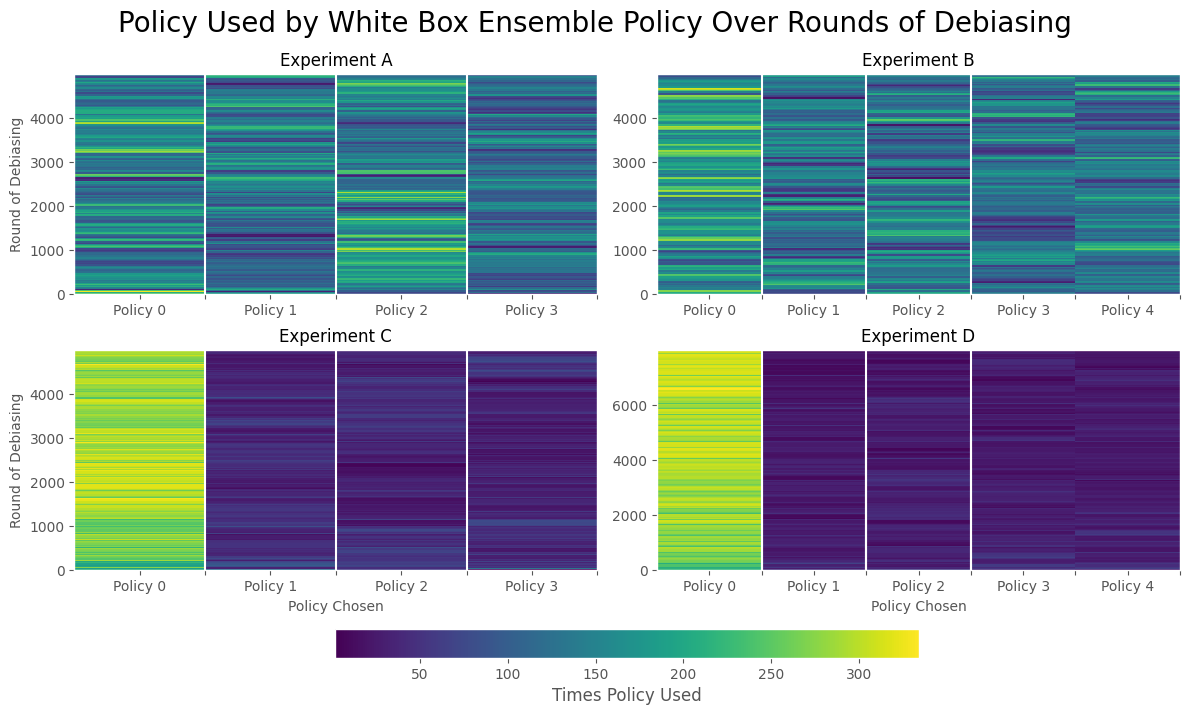

In [146]:
plt.style.use('ggplot')

# Number of colors you want
n_colors = 10
# Choose a colormap
colormap = plt.get_cmap('viridis')
# Generate colors from the colormap
colors = [colormap(i) for i in np.linspace(0, 1, n_colors)]
# Update the default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(12, 8))
fig.tight_layout(pad=4.0)  # Use tight_layout for better spacing

for i in range(len(pathsets)):

    wbPath = f'experiment-pipeline/debiased-models/{pathsets[i][1]}'
    with open(wbPath, 'rb') as file:
        maxModel = dill.load(file)
    
    max_policies = np.array(maxModel.max_policy_index_by_round)
   
    #cbar = plt.colorbar(label='Times Policy Used')

    if i==0 or i==2:
        hist_over_rounds = np.apply_along_axis(lambda row: np.histogram(row, bins=4)[0], axis=1, arr=max_policies)
        cmap = plt.get_cmap('viridis')
        im = axs[i//2,i%2].imshow(hist_over_rounds, 
                cmap=cmap, aspect='auto', origin='lower', interpolation='Nearest')
        axs[i//2,i%2].set_xticks(ticks=np.arange(0,4,0.5), labels=['Policy 0','', 'Policy 1','', 'Policy 2','', 'Policy 3',''])
        axs[i//2,i%2].vlines([0.5,1.5,2.5],0, 4999, color='white')  
    if i==1 or i==3:
        hist_over_rounds = np.apply_along_axis(lambda row: np.histogram(row, bins=5)[0], axis=1, arr=max_policies)
        cmap = plt.get_cmap('viridis')
        im = axs[i//2,i%2].imshow(hist_over_rounds, 
                cmap=cmap, aspect='auto', origin='lower', interpolation='Nearest')
        axs[i//2,i%2].set_xticks(ticks=np.arange(0,5,0.5), labels=['Policy 0','', 'Policy 1','', 'Policy 2','', 'Policy 3','', 'Policy 4',''])
        axs[i//2,i%2].vlines([0.5,1.5,2.5],0, 4999, color='white')  
    if i==3:
        axs[i//2,i%2].vlines([0.5,1.5,2.5],0, 7999, color='white')  
    axs[i//2,i%2].grid(False)
    axs[i//2,i%2].set_title(f'Experiment {experimentNames[i]}', fontsize=12)
     

axs[0,0].set_ylabel('Round of Debiasing', fontsize=10)
axs[1,0].set_ylabel('Round of Debiasing', fontsize=10)
axs[1,0].set_xlabel('Policy Chosen', fontsize=10)
axs[1,1].set_xlabel('Policy Chosen', fontsize=10)

fig.suptitle('Policy Used by White Box Ensemble Policy Over Rounds of Debiasing', fontsize=20)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.subplots_adjust(top=0.9, bottom=0.17) 
cbar = fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('Times Policy Used')
plt.savefig('paper-figs/WBPolicyChosen.pdf',dpi=fig.dpi)





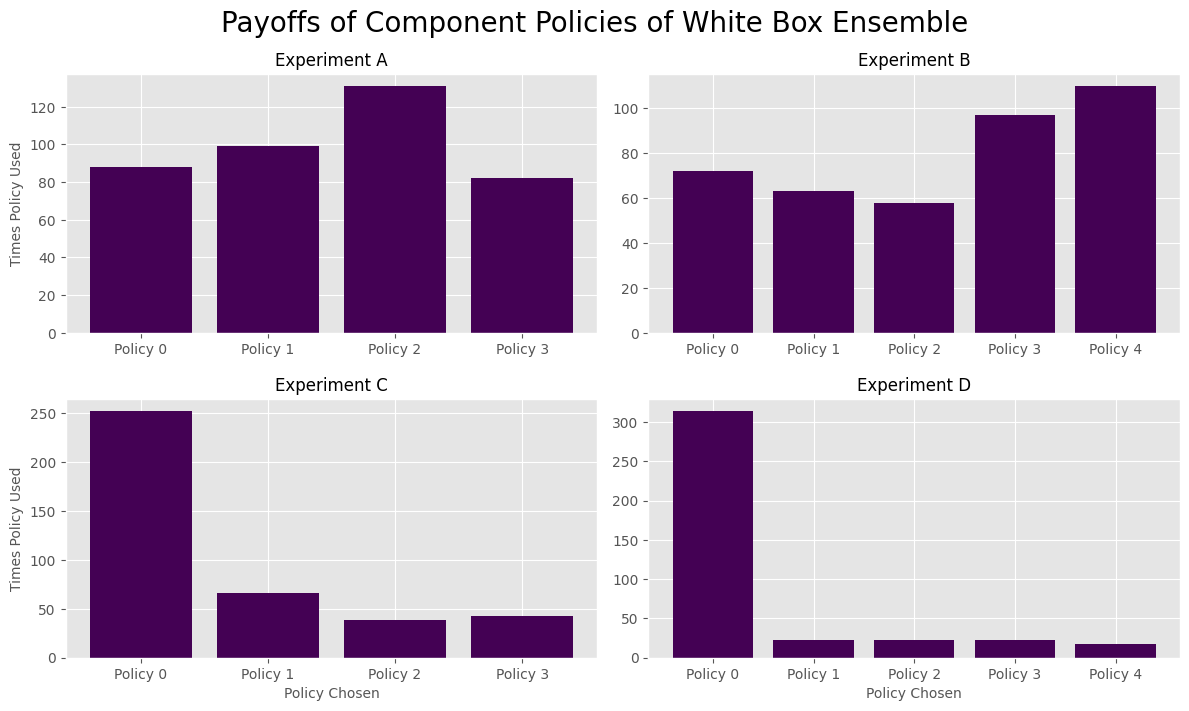

In [75]:
plt.style.use('ggplot')

# Number of colors you want
n_colors = 10
# Choose a colormap
colormap = plt.get_cmap('viridis')
# Generate colors from the colormap
colors = [colormap(i) for i in np.linspace(0, 1, n_colors)]
# Update the default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(12, 8))
fig.tight_layout(pad=4.0)  # Use tight_layout for better spacing

for i in range(len(pathsets)):
    wbPath = f'experiment-pipeline/debiased-models/{pathsets[i][1]}'
    with open(wbPath, 'rb') as file:
        maxModel = dill.load(file)

    if i==0 or i==2:
        axs[i//2, i%2].bar(['Policy 0', 'Policy 1', 'Policy 2', 'Policy 3'],np.unique(maxModel.max_policy_index_by_round[-1], return_counts=True)[1])
        axs[i//2,i%2].set_title(f'Experiment {experimentNames[i]}', fontsize=12)
    else:
        axs[i//2, i%2].bar(['Policy 0', 'Policy 1', 'Policy 2', 'Policy 3', 'Policy 4'],np.unique(maxModel.max_policy_index_by_round[-1], return_counts=True)[1])
        axs[i//2,i%2].set_title(f'Experiment {experimentNames[i]}', fontsize=12)

axs[0,0].set_ylabel('Times Policy Used', fontsize=10)
axs[1,0].set_ylabel('Times Policy Used', fontsize=10)
axs[1,0].set_xlabel('Policy Chosen', fontsize=10)
axs[1,1].set_xlabel('Policy Chosen', fontsize=10)

fig.suptitle("Payoffs of Component Policies of White Box Ensemble", fontsize=20)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.subplots_adjust(top=0.9, bottom=0.17) 
plt.savefig('paper-figs/FinalRoundHistograms.pdf')

In [107]:
data = np.array(maxModel.policies_by_round)
data.shape

(8000, 5, 400, 4)

In [104]:
np.mean(np.var(np.array(maxModel.policies_by_round)[0], axis=0))
#np.mean(np.var(np.array(maxModel.policies_by_round)[0], axis=0))

0.03620100000000001

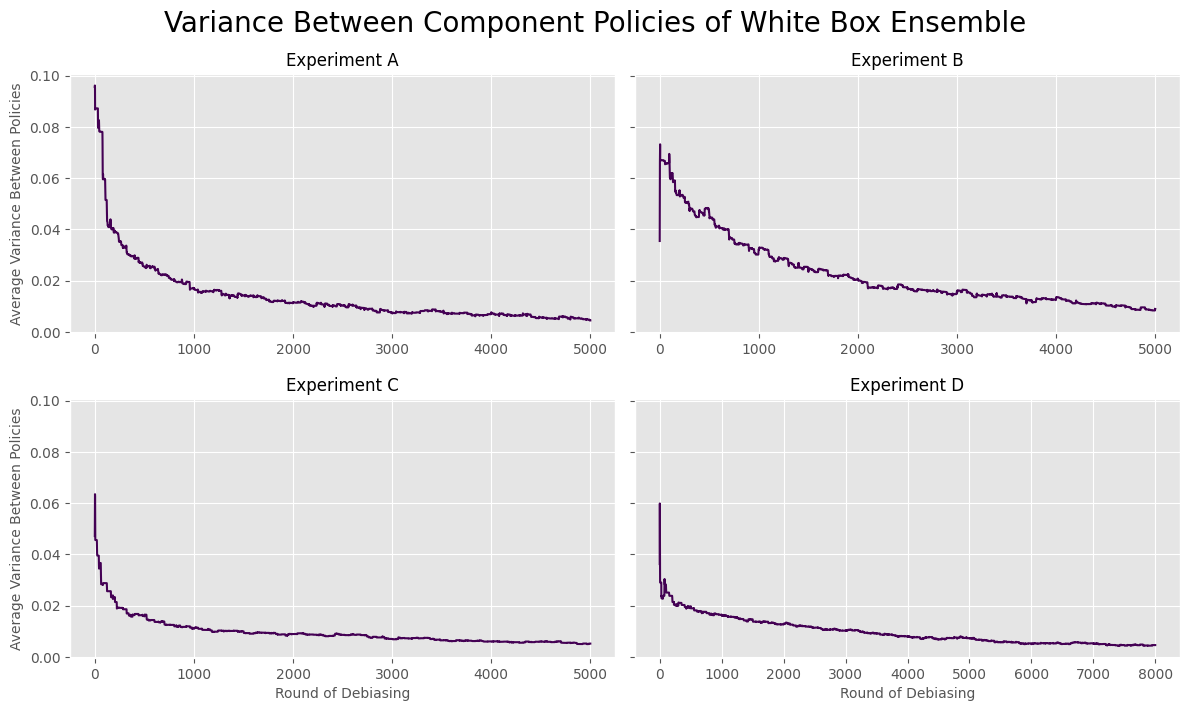

In [124]:
plt.style.use('ggplot')

# Number of colors you want
n_colors = 10
# Choose a colormap
colormap = plt.get_cmap('viridis')
# Generate colors from the colormap
colors = [colormap(i) for i in np.linspace(0, 1, n_colors)]
# Update the default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

fig, axs = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(12, 8))
fig.tight_layout(pad=4.0)  # Use tight_layout for better spacing

for i in range(len(pathsets)):
    wbPath = f'experiment-pipeline/debiased-models/{pathsets[i][1]}'
    with open(wbPath, 'rb') as file:
        maxModel = dill.load(file)

    out = np.zeros(len(maxModel.policies_by_round))
    for j in range(len(maxModel.policies_by_round)):
        out[j] = np.mean(np.var(maxModel.policies_by_round[j], axis=0))

    axs[i//2, i%2].plot(out)
    axs[i//2,i%2].set_title(f'Experiment {experimentNames[i]}', fontsize=12)

axs[0,0].set_ylabel('Average Variance Between Policies', fontsize=10)
axs[1,0].set_ylabel('Average Variance Between Policies', fontsize=10)
axs[1,0].set_xlabel('Round of Debiasing', fontsize=10)
axs[1,1].set_xlabel('Round of Debiasing', fontsize=10)

fig.suptitle("Variance Between Component Policies of White Box Ensemble", fontsize=20)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.subplots_adjust(top=0.9, bottom=0.17) 
plt.savefig('paper-figs/WBvariance.pdf')

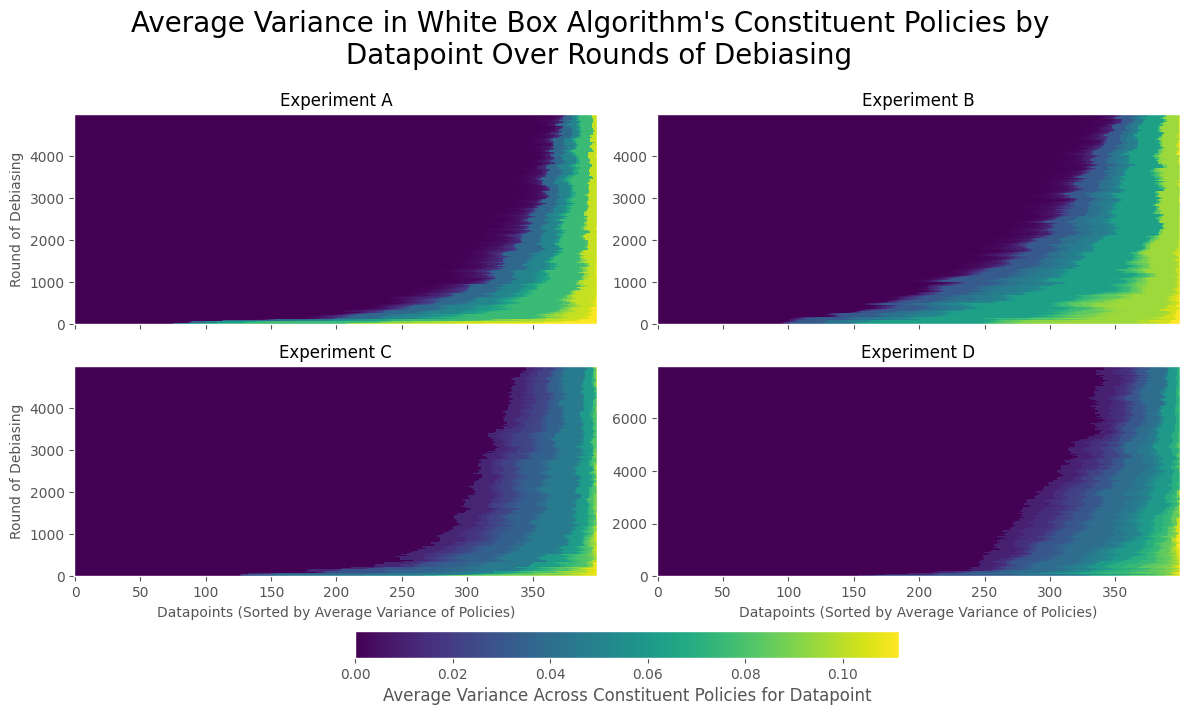

In [151]:
plt.style.use('ggplot')

# Number of colors you want
n_colors = 10
# Choose a colormap
colormap = plt.get_cmap('viridis')
# Generate colors from the colormap
colors = [colormap(i) for i in np.linspace(0, 1, n_colors)]
# Update the default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(12, 8))
fig.tight_layout(pad=4.0)  # Use tight_layout for better spacing

for i in range(len(pathsets)):

    wbPath = f'experiment-pipeline/debiased-models/{pathsets[i][1]}'
    with open(wbPath, 'rb') as file:
        maxModel = dill.load(file)
    
    max_policies = np.array(maxModel.max_policy_index_by_round)
   
    out = np.zeros((len(maxModel.policies_by_round), 400))
    for j in range(len(maxModel.policies_by_round)):
        out[j] = np.sort(np.mean(np.var(maxModel.policies_by_round[j], axis=0), axis=1))

    cmap = plt.get_cmap('viridis')
    im = axs[i//2,i%2].imshow(out, 
                    cmap=cmap, aspect='auto', origin='lower', interpolation='Nearest')
    axs[i//2,i%2].grid(False)
    axs[i//2,i%2].set_title(f'Experiment {experimentNames[i]}', fontsize=12)     

axs[0,0].set_ylabel('Round of Debiasing', fontsize=10)
axs[1,0].set_ylabel('Round of Debiasing', fontsize=10)
axs[1,0].set_xlabel('Datapoints (Sorted by Average Variance of Policies)', fontsize=10)
axs[1,1].set_xlabel('Datapoints (Sorted by Average Variance of Policies)', fontsize=10)

fig.suptitle("Average Variance in White Box Algorithm's Constituent Policies by \n Datapoint Over Rounds of Debiasing", fontsize=20)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.subplots_adjust(top=0.85, bottom=0.17) 
cbar = fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('Average Variance Across Constituent Policies for Datapoint')
plt.savefig('paper-figs/AverageVarianceHeatmap.pdf',dpi=fig.dpi)



# out = np.zeros((len(maxModel.policies_by_round), 400))
# for j in range(len(maxModel.policies_by_round)):
#     out[j] = np.sort(np.mean(np.var(maxModel.policies_by_round[j], axis=0), axis=1))

# plt.imshow(out, 
#                 cmap=cmap, aspect='auto', origin='lower', interpolation='Nearest')
# plt.grid(False)
# cbar = plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.1)
# cbar.set_label('Average Variance Across Policies for Datapoint')


# Out of Sample Results

In [8]:
main_path = 'experiment-pipeline/out-of-sample'
experimentNames = ['A', 'B', 'C', 'D']

bbPreds_oos, wbPreds_oos, wbPredPayoff_oos, wbRealPayoff_oos, bbPredPayoff_oos, bbRealPayoff_oos = [],[],[],[],[],[]

for i in range(len(experimentNames)):
    path = f"{main_path}/{experimentNames[i]}"

    bbPreds_oos.append(np.load(f"{path}/bbPreds.npy"))
    wbPreds_oos.append((f"{path}/wbPreds.npy"))
    wbPredPayoff_oos.append(np.load(f"{path}/wbPredPayoff.npy"))
    wbRealPayoff_oos.append(np.load(f"{path}/wbRealPayoff.npy"))
    bbPredPayoff_oos.append(np.load(f"{path}/bbPredPayoff.npy"))
    bbRealPayoff_oos.append(np.load(f"{path}/bbRealPayoff.npy"))


In [19]:
# now get equivalent numbers in sample
for i in range(len(experimentNames)):
    bbPath = f'experiment-pipeline/debiased-models/{pathsets[i][0]}'
    wbPath = f'experiment-pipeline/debiased-models/{pathsets[i][1]}'
    with open(bbPath, 'rb') as file:
        bbModel = dill.load(file)
    with open(wbPath, 'rb') as file:
        wbModel = dill.load(file)

    # bbPredPayoff_is = np.mean(np.sum(np.multiply(bbModel.predictions_by_round, np.array(bbModel.policy_by_round)), axis=2), axis=1)
    # bbRealPayoff = np.sum(np.multiply(bbModel.train_y, bbModel.policy_by_round))
    # meta_real_rev = []
    # meta_pred_rev = []
    # for j in range(maxModel.curr_depth):
    #     meta_real_rev.append(np.mean(maxModel.realized_revs_by_round[j][maxModel.max_policy_index_by_round[j], np.arange(maxModel.n)]))
    #     meta_pred_rev.append(np.mean(maxModel.self_assessed_revs_by_round[j][maxModel.max_policy_index_by_round[j], np.arange(maxModel.n)]))


In [27]:
bbPredPayoff_is = np.sum(np.multiply(bbModel.predictions_by_round[-1], bbModel.policy_by_round[-1]), axis=1)
bbRealPayoff_is = np.sum(np.multiply(bbModel.train_y, bbModel.policy_by_round[-1]), axis=1)

#wbModelPredPayoff_is = wbModel.

In [26]:
wbModel.

In [15]:
(wbPredPayoff_oos[0]-wbRealPayoff_oos[0])**2

array([2.45632205e+02, 3.03958174e+01, 1.02993293e+02, 6.45672825e+02,
       5.01384958e+02, 2.71611342e+02, 2.66213913e+02, 2.08307685e+02,
       1.30705622e+02, 2.64729204e+01, 8.83076112e+01, 5.71378008e+02,
       3.42740420e+00, 3.17596652e+01, 2.31090575e+01, 2.49220368e+01,
       7.81682382e+02, 5.49039629e+01, 1.54704323e+00, 2.48344032e+01,
       5.02285136e-01, 6.12382884e+01, 5.36309714e+01, 3.64246384e+02,
       1.06054390e+02, 2.36956037e+01, 1.02901247e+01, 7.77856514e+01,
       6.12188602e+02, 1.36957081e+01, 3.67115353e+02, 1.45222464e+01,
       6.93094996e+02, 4.20270506e+02, 6.28947383e+01, 5.07982659e-01,
       5.77937914e+02, 1.95126414e+01, 2.09798233e+02, 1.94222397e+01,
       3.80681648e+02, 2.92523781e+01, 7.51031144e+01, 9.72847835e+02,
       1.85395260e+02, 5.54547793e+02, 6.52163725e+00, 3.69340753e+02,
       2.93041936e+00, 7.60757616e+01, 1.53897209e+02, 5.24937699e+00,
       3.33101889e+02, 4.08294123e+01, 3.90146795e+00, 1.30047139e+01,
      